In [3]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt

# create a universe from the dump file
# guess bond based on distance from the initial topology
u = mda.Universe("cnt.data", "dump.lammpstrj",
               topology_format="data", format="lammpsdump",
               guess_bonds=True, vdwradii={'1':1.7})
# create a group
cnt = u.select_atoms("type 1")

nbond_vs_time = []
lbond_vs_time = []
# loop over trajectory
for ts in u.trajectory:
   # sabe the bond of the timestep ts in a list
   all_bonds_ts = []
   # loop over all initially detected bond
   for id1, id2 in cnt.atoms.bonds.indices:
      # detect positions
      pos1 = u.atoms.positions[u.atoms.indices == id1]
      pos2 = u.atoms.positions[u.atoms.indices == id2]
      d = pos1-pos2
      r = np.sqrt(d[:, 0]**2 + d[:, 1]**2 + d[:, 2]**2)
      if r < 1.8: # assume that bond longer than 1.8 angstroms are broken
            all_bonds_ts.append(r)
   lbond_vs_time.append([ts.time*5000*0.0005, np.mean(all_bonds_ts)])
   nbond_vs_time.append([ts.time*5000*0.0005, len(all_bonds_ts)/2]) # divide by 2 to avoid counting twice
nbond_vs_time = np.array(nbond_vs_time)
lbond_vs_time = np.array(lbond_vs_time)

/tmp/ipykernel_136692/2184568418.py:28: UserWarning: Reader has no dt information, set to 1.0 ps
  lbond_vs_time.append([ts.time*5000*0.0005, np.mean(all_bonds_ts)])
/tmp/ipykernel_136692/2184568418.py:29: UserWarning: Reader has no dt information, set to 1.0 ps
  nbond_vs_time.append([ts.time*5000*0.0005, len(all_bonds_ts)/2]) # divide by 2 to avoid counting twice


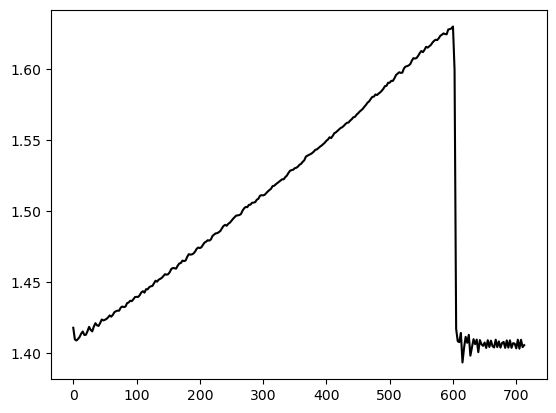

In [11]:
#print(lbond_vs_time.T[0])
# print(lbond_vs_time.T[1])
plt.plot(lbond_vs_time.T[0], lbond_vs_time.T[1], color = 'black')
plt.show()

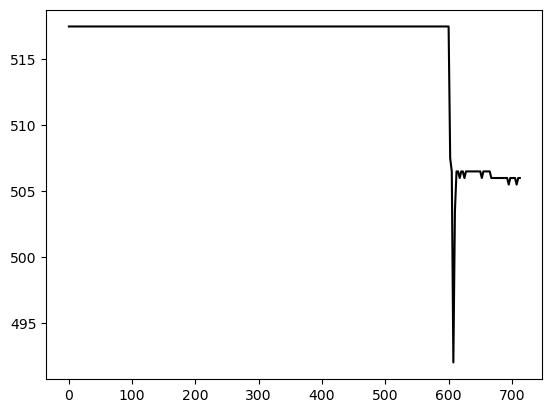

In [12]:
#print(nbond_vs_time.T[0])
# print(nbond_vs_time.T[1])
plt.plot(nbond_vs_time.T[0], nbond_vs_time.T[1], color = 'black')
plt.show()